# Deep Learning Lab - 3. Recurrent Neural Network

This lab is for introducting Recurrent Neural Networks using TensorFlow and Keras API.

**A Recurrent Neural Networks (RNNs)** process sequential data by maintaining a hidden state that carries information from previous time steps. This allows them to learn from both current and past inputs, making them useful for tasks like time series prediction.

The recurrent neural network allows information to flow from one step to the next with a repetitive structure.You combine the activated neuro from the previous step with the current input to produce an output and an updated activated neuro to support the next input at t+1.

![temp.jpg](https://scientistcafe.com/ids/images/rnnrollout.png)

RNNs can be categorized based on the relationship between the input and output sequences. Here are the main types:

**1. One-to-One**

This is the most basic form of neural network structure, which is not specific to RNNs. In a one-to-one structure, a single input produces a single output. This setup is common in simple tasks where the input data is independent of previous or future inputs.

**2. One-to-Many**

In a one-to-many RNN, a single input produces a sequence of outputs. The network processes the single input, and from that, it generates a series of outputs over time. This structure is useful when the task involves generating sequential data from a single input, such as a fixed-length input that leads to multiple time steps of output.

**3. Many-to-One**

In this structure, the network takes a sequence of inputs and produces a single output. The RNN processes the entire input sequence step by step and then combines the learned information into a final output at the end. This structure is useful when the goal is to predict a single label or value based on a series of inputs.

**4. Many-to-Many (Same Length)**

In this structure, both the input and output are sequences of the same length, with each input time step having a corresponding output. The RNN processes each time step of the input and produces an output for each, making it ideal for tasks where the input-output pairs are aligned at each time step.

**5. Many-to-Many (Different Length)**

This structure allows the input and output sequences to have different lengths. The RNN processes the input sequence first, and after completing the sequence, it starts generating the output sequence. This is useful when the input and output are related but have different time steps.

![temp1.jpg](https://scientistcafe.com/ids/images/rnnstrs.png)

## Implementation

### Step 0: Install dependencies
In this lab, we use [TensorFlow](https://www.tensorflow.org/). TensorFlow is an open-source platform developed by Google for machine learning and deep learning. if you are using Kaggle or Google Colab environment, you can use TensorFlow without installing that but if you want to run your code locally you can install Tensorflow by using the following command with pip:



In [35]:
! pip install tensorflow==2.16.1

In [36]:
import tensorflow as tf
print(tf.version.VERSION)

2.16.1


### Step 1: Data Preparation

We use and load **Sunspots Dataset**. It contains monthly observations of sunspot counts from 1700 to the present. Sunspots are dark spots on the sun's surface caused by magnetic activity.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Load the Sunspots dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/Sunspots.csv"
data = tf.keras.utils.get_file("sunspots.csv", dataset_url)

import pandas as pd
df = pd.read_csv(data)

# Inspect the data
print(df.head())

   Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7


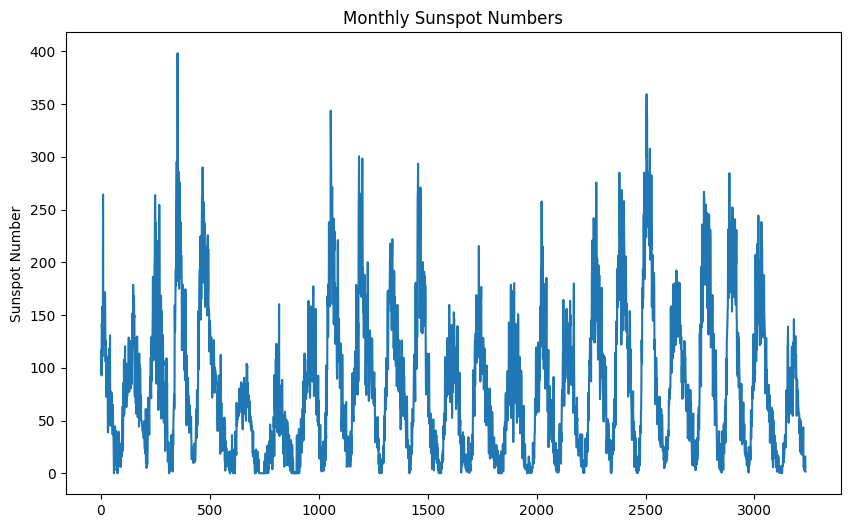

In [39]:
sunspots = df['Monthly Mean Total Sunspot Number'].values

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(sunspots)
plt.title("Monthly Sunspot Numbers")
plt.ylabel("Sunspot Number")
plt.show()

In [40]:
window_size = 30
test_size = 60

x_test=[]
y_test=[]
x_train=[]
y_train=[]

for i in range(test_size - window_size - 1):
    x_test.append(sunspots[-1 * test_size + i : -1 * test_size + i + window_size])
    y_test.append(sunspots[-1 * test_size + i + window_size])
        
sunspots = sunspots[:-1*test_size]

In [41]:
for i in range(len(sunspots) - window_size - 1):
    window = sunspots[i:i + window_size + 1]
    x_train.append(window[:-1])  # Features (input sequence)
    y_train.append(window[-1])   # Label (target value)

x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.array(x_train)
y_train = np.array(y_train)

print("Shape of X:", x_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (3144, 30)
Shape of y: (3144,)


### Step 2: Define the Model


* The `SimpleRNN` layer processes sequences by maintaining a hidden state across time steps, allowing it to capture temporal dependencies in data. It updates the hidden state using the current input and previous hidden state.

* The `Dropout` method is a regularization technique that randomly sets a fraction of input units to zero during training. This helps prevent overfitting by ensuring that the model doesn't rely too heavily on any one neuron. The fraction of units to drop is controlled by the `rate` parameter, typically between 0 and 1.

In [42]:
# Initialising the RNN
rnn_model = tf.keras.models.Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn_model.add(tf.keras.layers.SimpleRNN(units = 60,activation='tanh', return_sequences = True, input_shape = (x_train.shape[1], 1)))
rnn_model.add(tf.keras.layers.Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
rnn_model.add(tf.keras.layers.SimpleRNN(units = 60,activation='tanh', return_sequences = True))
rnn_model.add(tf.keras.layers.Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
rnn_model.add(tf.keras.layers.SimpleRNN(units = 60,activation='tanh', return_sequences = True))
rnn_model.add(tf.keras.layers.Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
rnn_model.add(tf.keras.layers.SimpleRNN(units = 60))
rnn_model.add(tf.keras.layers.Dropout(0.2))

# Adding the output layer
rnn_model.add(tf.keras.layers.Dense(units = 1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 3: Compile the model
We specify the loss function to use to evaluate a set of weights. 

We will use `mean_squared_error` as a loss function. The mean_squared_error (MSE) loss function in TensorFlow calculates the average squared difference between predicted and actual values. It's commonly used in regression tasks, like in the RNN.

We also specify the optimizer used to search through different weights for the network. Here we will use `adam` optimizer. Adam optimizer adjusts the learning rate during training for efficient convergence.

In [43]:
# Compiling the RNN
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 30, 60)         │         3,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 30, 60)         │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 30, 60)         │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,561 (99.85 KB)

 Trainable params: 25,561 (99.85 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Train the Model
We can train the model using the `fit()` method. We can also set the number of instances that are evaluated before a weight update in the network is performed called the **batch size** and set using the `batch_size` argument. The model will pass through the entire dataset each times during training according to the number of `epochs`.

In [44]:
# Fitting the RNN to the Training set
history = rnn_model.fit(x_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - loss: 9811.5947
Epoch 2/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8336.6035
Epoch 3/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7025.4746
Epoch 4/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5861.9033
Epoch 5/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5529.5386
Epoch 6/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4617.0166
Epoch 7/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4012.6096
Epoch 8/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3471.9045
Epoch 9/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3007.9644
Epoch 10/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2766.5884
Epoch 11/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2666.1807
Epoch 12/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2377.3225
Epoch 13/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2149.1140
Epoch 14/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - lo

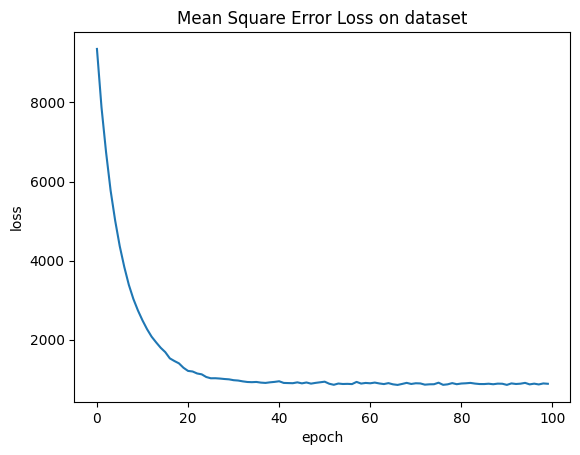

In [45]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Mean Square Error Loss on dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Step 5: Evaluate model

We can evaluate our model on validation dataset using the `evaluate()` function. This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy that we set before.

In [46]:
loss = rnn_model.evaluate(x_test, y_test)
print("Loss : ",loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step - loss: 155.8854
Loss :  155.88543701171875


In [47]:
predict= rnn_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step


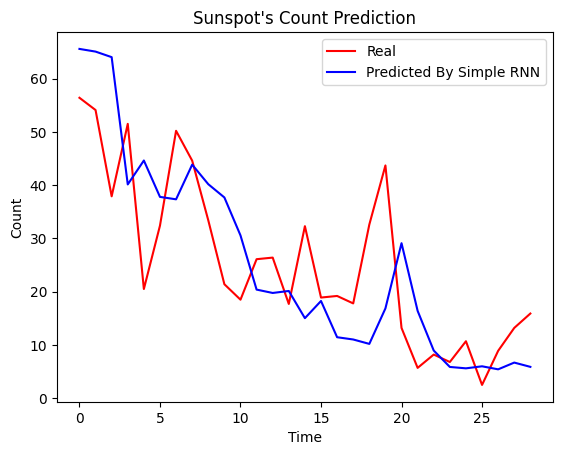

In [57]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(predict, color = 'blue', label = 'Predicted By Simple RNN')
plt.title("Sunspot's Count Prediction")
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

# Long Short Term Memory (LSTM)
LSTM (Long Short-Term Memory) is a type of neural network used to process sequences, like sentences or time series. It improves on regular RNNs by using special gates to control what information is kept or forgotten over time. This helps LSTM remember important details from earlier steps in a sequence, making it useful for tasks where long-term memory is needed.

In an LSTM cell, there are three main gates that help control the flow of information: **input gate, forget gate, and output gate**. Each gate plays a crucial role in determining how information is stored, updated, or discarded within the cell.


### 1. Forget Gate ($f_t$)

- **Purpose:** Decides what information to "forget" or discard from the previous cell state $ c_{t-1} $.
- **Equation:** $ f_t = \sigma(x_tU^f + h_{t-1}W^f) $
- **Explanation:** It outputs a value between 0 and 1 for each component of the cell state, where 0 means "completely forget" and 1 means "completely retain." This allows the cell to drop irrelevant information.

### 2. Input Gate ($i_t$)

- **Purpose:** Decides what new information to add to the cell state.
- **Equation:** $ i_t = \sigma(x_tU^i + h_{t-1}W^i) $
- **Explanation:** It determines which parts of the new candidate values $ \tilde{C}_t $ (potential new information) are significant and should be updated in the cell state, with values ranging from 0 (ignore) to 1 (fully update).

### 3. Output Gate ($o_t$)

- **Purpose:** Controls what information from the current cell state $ c_t $ is output as the hidden state $ h_t $.
- **Equation:** $ o_t = \sigma(x_tU^o + h_{t-1}W^o) $
- **Explanation:** It decides the amount of the cell state to be outputted, essentially filtering the internal state before sending it to the next hidden state.

### Cell State and Output Update

- **New Candidate State:** 
  - Equation: $ \tilde{C}_t = \tanh(x_tU^g + h_{t-1}W^g) $
  - Purpose: Creates a candidate cell state by considering both the new input and the previous hidden state.
- **Cell State Update:**
  - Equation: $ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t $
  - Purpose: Combines the old cell state (modulated by the forget gate) and the new candidate state (modulated by the input gate) to form the new cell state.
- **Output State:**
  - Equation: $ h_t = \tanh(C_t) \cdot o_t $
  - Purpose: The output gate filters the cell state to form the output hidden state.

This mechanism allows LSTMs to effectively manage memory, making them suitable for tasks requiring learning over sequences where long-term dependencies exist.


![lstm_architecture.jpg](https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg)

## Implementation

### Step 1: Data Preparation

we use the previous dataset related to the count of sunspots.

### Step 2: Define the Model

* The `LSTM` layer processes sequences using gating mechanisms to manage information flow. Key parameters include `units` for the number of neurons, `return_sequences` to decide if the full sequence or just the last output is returned, and `return_state` to include hidden and cell states in the output.

In [49]:
lstm_model = tf.keras.models.Sequential()

lstm_model.add(tf.keras.layers.LSTM(50, activation='tanh', input_shape=(x_train.shape[1],1))) # 50 lstm neuron(block)
lstm_model.add(tf.keras.layers.Dense(1))

### Step 3: Compile the model

In [50]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

### Step 4: Train the Model

In [51]:
history = lstm_model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 11559.8867
Epoch 2/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9225.2197
Epoch 3/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7877.5430
Epoch 4/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7051.1948
Epoch 5/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6331.2588
Epoch 6/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5620.0566
Epoch 7/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4888.6035
Epoch 8/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4573.0439
Epoch 9/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4121.9507
Epoch 10/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3776.0269
Epoch 11/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3466.5017
Epoch 12/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3087.7173
Epoch 13/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2878.5249
Epoch 14/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2713.2690


### Step 5: Evaluate model

In [52]:
loss = lstm_model.evaluate(x_test, y_test)
print("Loss : ",loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step - loss: 111.3420
Loss :  111.3420181274414


In [53]:
lstm_predict= lstm_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


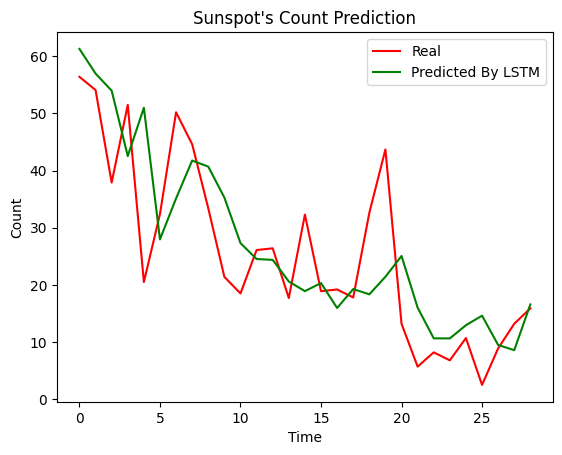

In [56]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(lstm_predict, color = 'green', label = 'Predicted By LSTM')
plt.title("Sunspot's Count Prediction")
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()